In [ ]:
# Figure 7 in Section 5.1

import numpy as np
import pandas as pd
import os

base_path = 'datasets'
os.makedirs(base_path, exist_ok=True)

num_tuples = 2000  # 每个数据集样本数量
dimensions = 3     # 数据维度

columns = [f'dimension_{i}' for i in range(dimensions)]

uniform_configs = [
    {'low': 0, 'high': 1},
    {'low': -1, 'high': 1},
    {'low': 0.2, 'high': 0.8}
]

gaussian_configs = [
    {'loc': 0.5, 'scale': 0.1},
    {'loc': 0, 'scale': 1},
    {'loc': 0.7, 'scale': 0.2}
]

skewed_configs = [
    {'a': 2, 'b': 5},
    {'a': 5, 'b': 2},
    {'a': 0.5, 'b': 0.5}
]

def save_dataset(data, name):
    df = pd.DataFrame(data, columns=columns)
    df.to_csv(os.path.join(base_path, f"{name}.csv"), index=False)

for idx, cfg in enumerate(uniform_configs, 1):
    data = np.random.uniform(low=cfg['low'], high=cfg['high'], size=(num_tuples, dimensions))
    save_dataset(data, f'uniform_param{idx}')

for idx, cfg in enumerate(gaussian_configs, 1):
    data = np.random.normal(loc=cfg['loc'], scale=cfg['scale'], size=(num_tuples, dimensions))
    save_dataset(data, f'gaussian_param{idx}')

for idx, cfg in enumerate(skewed_configs, 1):
    data = np.random.beta(a=cfg['a'], b=cfg['b'], size=(num_tuples, dimensions))
    save_dataset(data, f'skewed_param{idx}')


In [ ]:
from watermarking_schemes.B2Mark_synthetic import B2MarkWatermarkEmbedding
seed = 10000
g = 3
k = 10
secret_key = "123"
dataset = "gaussian"
for idx in range(1,4):
    original_data_path = f"datasets/{dataset}_param{idx}.csv"

    b2Mark_embedding = B2MarkWatermarkEmbedding(dataset = dataset, seed = seed, g = g, secret_key = secret_key, k = k, columns_of_interest = ['dimension_0', 'dimension_1'], watermarked_column = 'dimension_2')
    b2Mark_embedding.load_data(original_data_path)

    b2Mark_embedding.generate_segments()
    b2Mark_embedding.process_data()
    b2Mark_embedding.save_results(f"datasets/{dataset}_param{idx}_{seed}.npy")


In [ ]:
from watermarking_schemes.B2Mark_synthetic import B2MarkWatermarkEmbedding
seed = 10000
g = 3
k = 10
secret_key = "123"
dataset = "uniform"
for idx in range(1,4):
    original_data_path = f"datasets/{dataset}_param{idx}.csv"

    b2Mark_embedding = B2MarkWatermarkEmbedding(dataset = dataset, seed = seed, g = g, secret_key = secret_key, k = k, columns_of_interest = ['dimension_0', 'dimension_1'], watermarked_column = 'dimension_2')
    b2Mark_embedding.load_data(original_data_path)

    b2Mark_embedding.generate_segments()
    b2Mark_embedding.process_data()
    b2Mark_embedding.save_results(f"datasets/{dataset}_param{idx}_{seed}.npy")


In [ ]:
from watermarking_schemes.B2Mark_synthetic import B2MarkWatermarkEmbedding
seed = 10000
g = 3
k = 10
secret_key = "123"
dataset = "skewed"
for idx in range(1,4):
    original_data_path = f"datasets/{dataset}_param{idx}.csv"

    b2Mark_embedding = B2MarkWatermarkEmbedding(dataset = dataset, seed = seed, g = g, secret_key = secret_key, k = k, columns_of_interest = ['dimension_0', 'dimension_1'], watermarked_column = 'dimension_2')
    b2Mark_embedding.load_data(original_data_path)

    b2Mark_embedding.generate_segments()
    b2Mark_embedding.process_data()
    b2Mark_embedding.save_results(f"datasets/{dataset}_param{idx}_{seed}.npy")


In [ ]:
import os
import glob
import numpy as np
import pandas as pd

# 初始化参数
distributions = ['uniform', 'gaussian', 'skewed']
# distributions = ['skewed']
params = ['param1', 'param2', 'param3']
seed = 10000
g = 3
k = 10
secret_key = "123"
np.random.seed(seed)

# attack_range = 0.3
attack_proportion_synthetic = [0.5]
attack_proportion_watermarked = [ 0.4, 0.5, 0.6, 0.7, 0.8]

# 分布配置
uniform_configs = [
    {'low': 0, 'high': 1},
    {'low': -1, 'high': 1},
    {'low': 0.2, 'high': 0.8}
]
gaussian_configs = [
    {'loc': 0.5, 'scale': 0.1},
    {'loc': 0, 'scale': 1},
    {'loc': 0.7, 'scale': 0.2}
]
skewed_configs = [
    {'a': 2, 'b': 5},
    {'a': 5, 'b': 2},
    {'a': 0.5, 'b': 0.5}
]
config_map = {
    'uniform': uniform_configs,
    'gaussian': gaussian_configs,
    'skewed': skewed_configs
}


base_path = 'datasets'

for dist in distributions:
    for i, param in enumerate(params):
        cfg = config_map[dist][i]
        name = f"{dist}_{param}"
        base_dir = os.path.join(base_path, name)
        
        attack_synthetic_dir = os.path.join(base_dir, 'attack_synthetic')
        attack_watermarked_dir = os.path.join(base_dir, 'attack_watermarked')
        generated_dir = os.path.join(base_dir, 'generated')

        # 创建并清空目录
        for dir_path in [attack_synthetic_dir, attack_watermarked_dir, generated_dir]:
            os.makedirs(dir_path, exist_ok=True)
            # 清空目录下所有文件
            for f in glob.glob(os.path.join(dir_path, '*')):
                os.remove(f)


        csv_file = os.path.join(base_path, f"{name}.csv")
        npy_file = os.path.join(base_path, f"{name}_{seed}.npy")
    
        if not os.path.exists(csv_file) or not os.path.exists(npy_file):
            print(f"[跳过] 缺失数据：{name}")
            continue

        origin_df = pd.read_csv(csv_file)
        loaded_results = np.load(npy_file, allow_pickle=True).item()
        watermarked_df = loaded_results['watermarked_data']
        
        medv_max = origin_df['dimension_2'].max()
        medv_min = origin_df['dimension_2'].min()
        attack_range = (medv_max - medv_min) * 0.3


        # 生成攻击原始数据
        for proportion in attack_proportion_synthetic:
            for j in range(100):
                temp = origin_df.copy()
                indices = np.random.choice(len(temp), size=int(proportion * len(temp)), replace=False)
                perturb_values = np.random.uniform(-attack_range, attack_range, size=len(indices))
                temp.loc[indices, 'dimension_2'] += perturb_values
                temp.to_csv(f"{base_dir}/attack_synthetic/{name}-{seed}-{proportion}-{j}.csv", index=False)

        # 生成攻击水印数据
        for proportion in attack_proportion_watermarked:
            for j in range(40):
                temp = watermarked_df.copy()
                indices = np.random.choice(len(temp), size=int(proportion * len(temp)), replace=False)
                perturb_values = np.random.uniform(-attack_range, attack_range, size=len(indices))
                temp.loc[indices, 'dimension_2'] += perturb_values
                temp.to_csv(f"{base_dir}/attack_watermarked/{name}-{seed}-{proportion}-{j}.csv", index=False)

        # 生成负样本
        for j in range(100):
            if dist == 'uniform':
                data = np.random.uniform(low=cfg['low'], high=cfg['high'], size=(2000, 3))
            if dist == 'gaussian':
                data = np.random.normal(loc=cfg['loc'], scale=cfg['scale'], size=(2000, 3))
            if dist == 'skewed':
                data = np.random.beta(a=cfg['a'], b=cfg['b'], size=(2000, 3))
            df = pd.DataFrame(data, columns=['dimension_0', 'dimension_1', 'dimension_2'])
            df.to_csv(f"{base_dir}/generated/{name}_{j}.csv", index=False)


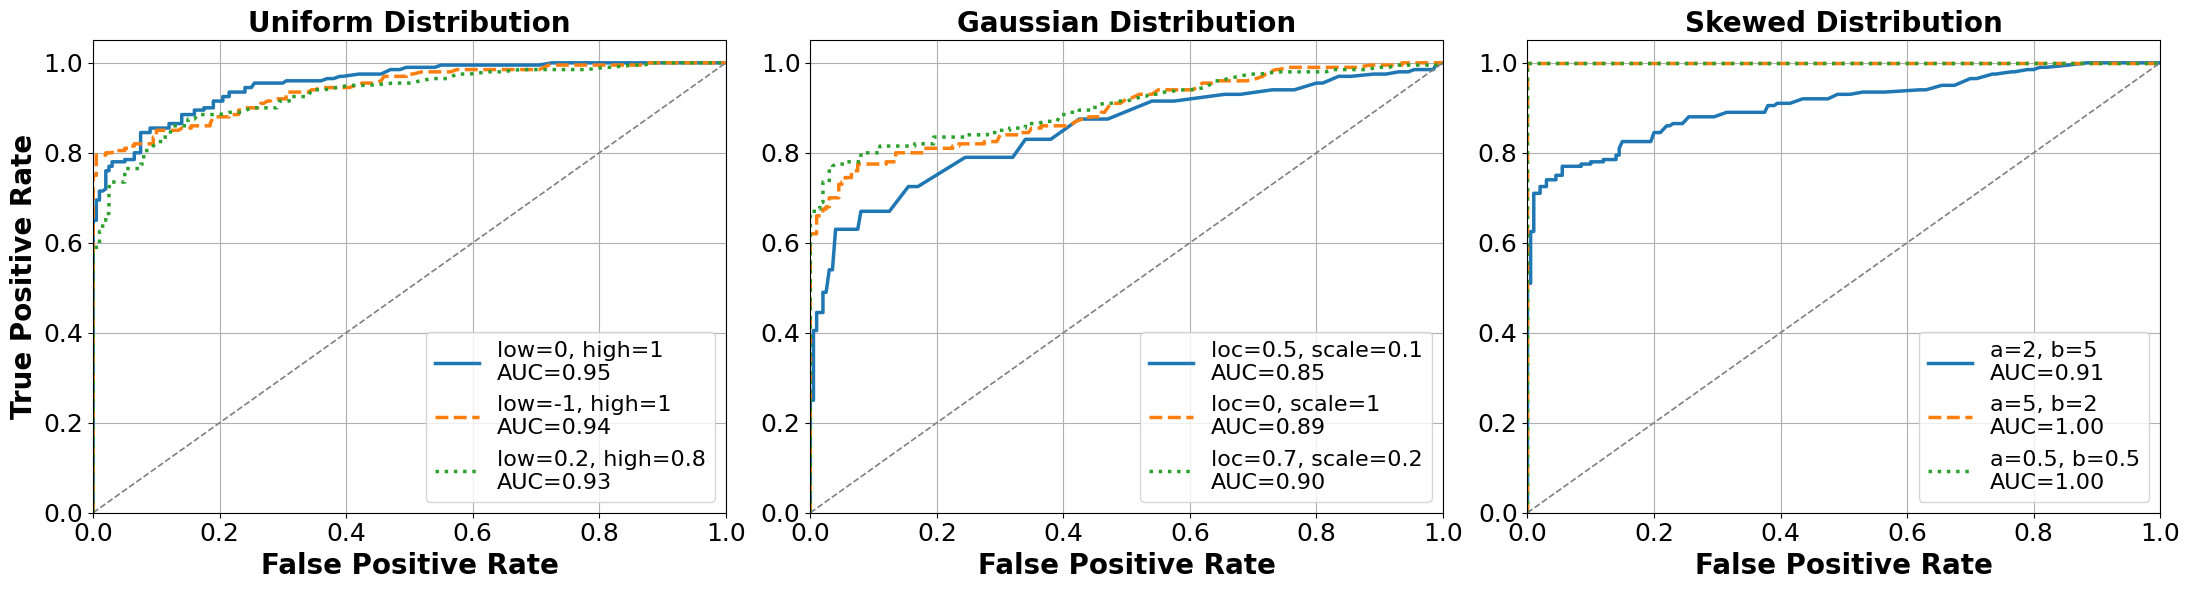

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from watermarking_schemes.B2Mark_synthetic import B2MarkWatermarkDetection
import matplotlib

# 参数配置
uniform_configs = [
    {'low': 0, 'high': 1},
    {'low': -1, 'high': 1},
    {'low': 0.2, 'high': 0.8}
]
gaussian_configs = [
    {'loc': 0.5, 'scale': 0.1},
    {'loc': 0, 'scale': 1},
    {'loc': 0.7, 'scale': 0.2}
]
skewed_configs = [
    {'a': 2, 'b': 5},
    {'a': 5, 'b': 2},
    {'a': 0.5, 'b': 0.5}
]
distribution_configs = {
    'uniform': uniform_configs,
    'gaussian': gaussian_configs,
    'skewed': skewed_configs
}
distributions = ['uniform', 'gaussian', 'skewed']
seed = 10000
g = 3
k = 10
secret_key = "123"
base_path = '/home/zhengyihao/BlindTabularMark-v2/revision/wider_set_of_configurations/dataset'

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
linestyles = ['-', '--', ':']

# 设置更大字体
plt.style.use("seaborn-v0_8-muted")
matplotlib.rcParams.update({
    'axes.labelweight': 'bold',
    'axes.labelsize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 16,
})

# 创建并排图
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

for i, dist in enumerate(distributions):
    ax = axes[i]
    config_list = distribution_configs[dist]

    for idx, config in enumerate(config_list):
        param_str = ', '.join([f'{k}={v}' for k, v in config.items()])
        name = f"{dist}_param{idx+1}"
        dataset_path = os.path.join(base_path, name)
        attack_synthetic_path = os.path.join(dataset_path, 'attack_synthetic')
        attack_watermarked_path = os.path.join(dataset_path, 'attack_watermarked')
        generated_path = os.path.join(dataset_path, 'generated')
        npy_file = os.path.join(base_path, f"{name}_{seed}.npy")
        csv_file = os.path.join(base_path, f"{name}.csv")

        if not os.path.exists(csv_file) or not os.path.exists(npy_file):
            continue

        original_data = pd.read_csv(csv_file)
        medv_max = original_data['dimension_2'].max()
        medv_min = original_data['dimension_2'].min()

        b2Mark_detection = B2MarkWatermarkDetection(
            dataset=name,
            seed=seed,
            g=g,
            secret_key=secret_key,
            k=k,
            columns_of_interest=['dimension_0', 'dimension_1'],
            watermarked_column='dimension_2'
        )

        z_scores = []
        true_labels = []

        for folder, label in [(attack_synthetic_path, 0), (attack_watermarked_path, 1), (generated_path, 0)]:
            for file in os.listdir(folder):
                if file.endswith('.csv'):
                    file_path = os.path.join(folder, file)
                    z_score = b2Mark_detection.run_detection(file_path, medv_min, medv_max)
                    z_scores.append(z_score)
                    true_labels.append(label)

        fpr, tpr, _ = roc_curve(true_labels, z_scores)
        roc_auc = auc(fpr, tpr)

        ax.plot(fpr, tpr, color=colors[idx], linestyle=linestyles[idx],
                lw=2.5, label=f'{param_str}\nAUC={roc_auc:.2f}')

    ax.plot([0, 1], [0, 1], color='grey', lw=1.2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate', fontsize=20, fontweight='bold')
    if i == 0:
        ax.set_ylabel('True Positive Rate', fontsize=20, fontweight='bold')
    ax.set_title(f'{dist.capitalize()} Distribution', fontsize=20, fontweight='bold')
    ax.grid(True)
    ax.legend(loc="lower right", frameon=True)

# 整体调整并保存
plt.tight_layout()
plt.savefig("ROC_combined.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# Table 4 in Section 5.1

import pandas as pd
import numpy as np
import os
import math
from sklearn.metrics import roc_curve, auc
import hashlib
import matplotlib.pyplot as plt


dataset = "synthetic"

original_file = 'datasets/synthetic_data.csv'
origin = pd.read_csv(original_file)

seed = 10000

medv_max = origin['dimension_0'].max()
medv_min = origin['dimension_0'].min()


gamma = 1/2
k = 10
g = 3
secret_key = "123"

columns_of_interest = ['dimension_1', 'dimension_2'] 
origin[columns_of_interest] = origin[columns_of_interest].fillna(0)  

np.random.seed(seed)
intervals = np.linspace(medv_min, medv_max, k + 1)
segments = [(intervals[i], intervals[i + 1]) for i in range(k)]
np.random.shuffle(segments)
half_k = k // 2
green_domains = segments[:half_k]
red_domains = segments[half_k:]
green_domain_values = [(low, np.nextafter(high, low)) for low, high in green_domains]


def hash_mod(key, mod_value):
    combined = f"{secret_key}{key}"
    hash_value = int(hashlib.sha256(combined.encode()).hexdigest(), 16)  
    return hash_value % mod_value  

def first_two_digits(x):
    if x == 0:
        return "00"
    digits = str(x).lstrip('0.').replace('.', '')  
    if len(digits) == 1:  
        return digits + "0"  
    return digits[:2] 

def calculate_z_score(watermarked_data):
    green_cell = 0
    n_cell = 0

    for idx in range(len(watermarked_data)):
        selected_data = watermarked_data.loc[idx, columns_of_interest]
        first_two_digits_data = selected_data.apply(first_two_digits)
        composite_numbers = ''.join(first_two_digits_data.values)
        if(hash_mod(composite_numbers, g) != 0):
            continue
        n_cell += 1
    
        for low, high in green_domains:
            if low <= watermarked_data.loc[idx, 'dimension_0'] < high:
                green_cell += 1
                break
    
    z_score = (green_cell - n_cell/2) / math.sqrt(n_cell/4)
    return z_score



z_scores = []
true_labels = []

path = 'ROC_datasets/attack_synthetic/'
for file in os.listdir(path):
    if file.endswith('.csv'):
        # print(file)
        watermarked_data = pd.read_csv(os.path.join(path, file))

        z_score = calculate_z_score(watermarked_data)
        # print(z_score)
        z_scores.append(z_score)
        true_labels.append(0)  


path = 'ROC_datasets/attack_watermarked'
for file in os.listdir(path):
    if file.endswith('.csv'):
        # print(file)
        watermarked_data = pd.read_csv(os.path.join(path, file))

        z_score = calculate_z_score(watermarked_data)
        z_scores.append(z_score)
        true_labels.append(1)  

path = 'ROC_datasets/generated'
for file in os.listdir(path):
    if file.endswith('.csv'):
        watermarked_data = pd.read_csv(os.path.join(path, file))

        z_score = calculate_z_score(watermarked_data)
        z_scores.append(z_score)
        true_labels.append(0)  
        
z_scores = np.array(z_scores).astype(float)
true_labels = np.array(true_labels)

z_scores_no_watermark = z_scores[true_labels == 0]

thresholds = {}

fpr_list = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for fpr in fpr_list:
    percentile = 100 - fpr
    threshold = np.percentile(z_scores_no_watermark, percentile)
    thresholds[fpr] = threshold

for fpr, threshold in thresholds.items():
    print(f"False Positive Rate: {fpr}%, Threshold: {threshold:.4f}")
    
